<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividades/Actividad%203/Actividad_3_UrrutiaFranco--18916762-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Franco Urrutia</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos muestra una onda senoidal.




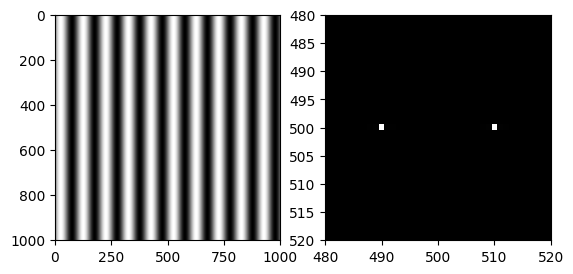

In [3]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength) #la longitud de onda es el inverso de la frecuencia

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating) #mueve la componente 0 al centro del arreglo
ft = np.fft.fft2(ft) #calcula transformada de fourier
ft = np.fft.fftshift(ft) #vulve a colocar la componente 0 en la posición original

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


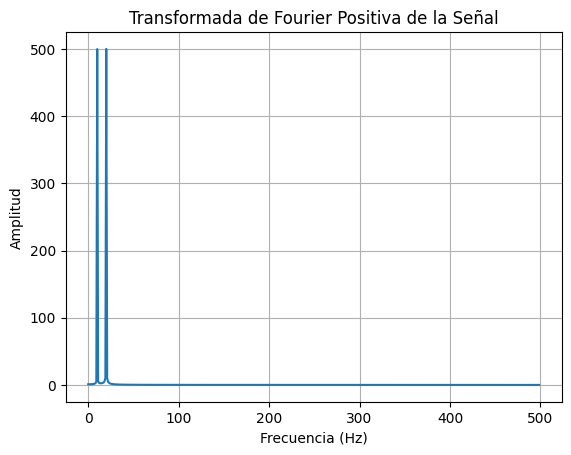

Frecuencias de los picos: [ 9.99 19.98]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# frecuencia de la señal en Hz
frecuencia = 10  # Hz

# rango de tiempo
tiempo_inicio = 0
tiempo_final = 1
num_puntos = 1000  # Número de puntos

#vector de tiempo
tiempo = np.linspace(tiempo_inicio, tiempo_final, num_puntos)

#Evaluación de la señal (coseno doble frecuencia a seno)
señal = np.sin(2 * np.pi * frecuencia * tiempo) + np.cos(4 * np.pi * frecuencia * tiempo)

# transformada de Fourier de la señal
transformada = np.fft.fft(señal)

#frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(transformada), d=tiempo[1]-tiempo[0])

# parte positiva del espectro
transformada_positiva = transformada[:len(transformada)//2]
frecuencias_positivas = frecuencias[:len(frecuencias)//2]

#picos de la transformada de Fourier
umbral = 0.1 * np.max(np.abs(transformada_positiva))
picos_indices = np.where(np.abs(transformada_positiva) > umbral)[0]
frecuencias_picos = frecuencias_positivas[picos_indices]

# Graficar la transformada de Fourier positiva
plt.plot(frecuencias_positivas, np.abs(transformada_positiva))
plt.title('Transformada de Fourier Positiva de la Señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

#frecuencias de los picos
print("Frecuencias de los picos:", frecuencias_picos)


\### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

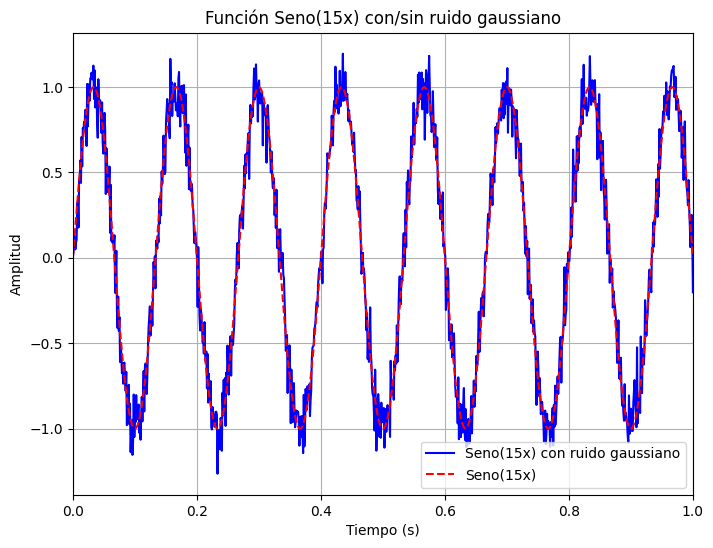

In [5]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 1000)  # rango de tiempo de 0 a 1 segundo

# función sin(15x)
frecuencia = 7.5  # Frecuencia de la señal en Hz
y_sin = np.sin(2 * np.pi * frecuencia * x)

# Agregar ruido gaussiano
mu, sigma = 0, 0.1  # Media y desviación estándar del ruido gaussiano
ruido = np.random.normal(mu, sigma, len(x))
y_con_ruido = y_sin + ruido

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y_con_ruido, label='Seno(15x) con ruido gaussiano', color='blue')
plt.plot(x, y_sin, label='Seno(15x)', linestyle='--', color='red')
plt.title('Función Seno(15x) con/sin ruido gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0, 1)  #rango de tiempo de 0 a 1 segundo
plt.legend()
plt.grid(True)
plt.show()


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


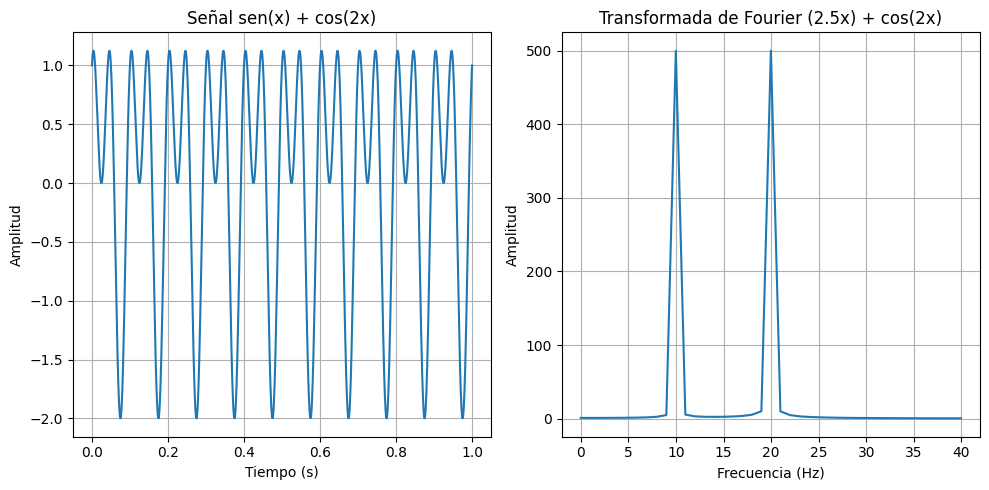

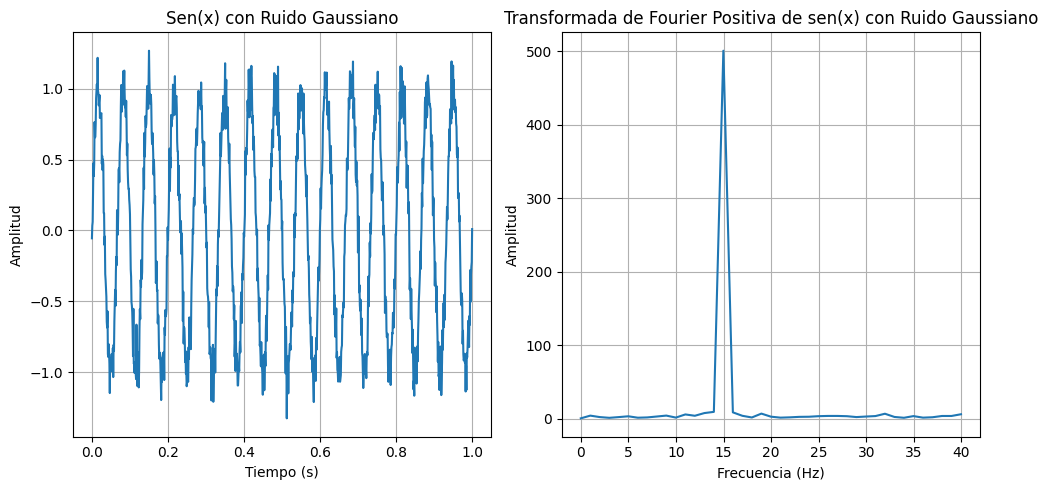

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#frecuencia sen(15x)
frecuencia_sen = 15  # Hz

#frecuencia de la señal sen(x)+cos(2x)
frecuencia_sen_cos = 10  # Hz

# rango de tiempo para la señal
tiempo_inicio = 0
tiempo_final = 1
num_puntos = 1000  # Número de puntos

#arreglo de tiempo
tiempo = np.linspace(tiempo_inicio, tiempo_final, num_puntos)

#señal sen(15x)
señal_sen = np.sin(2 * np.pi * frecuencia_sen * tiempo)

# sen(2.5x) + cos(2x)
señal_sen_cos = np.sin(2 * np.pi * frecuencia_sen_cos * tiempo) + np.cos(4 * np.pi * frecuencia_sen_cos * tiempo)

# Agregar ruido gaussiano a la señal sen(2.5x) + cos(2x)
media_ruido = 0
desviacion_estandar_ruido = 0.1
ruido = np.random.normal(media_ruido, desviacion_estandar_ruido, num_puntos)


# Agregar ruido gaussiano
ruido_sen = np.random.normal(media_ruido, desviacion_estandar_ruido, num_puntos)
señal_con_ruido_sen = señal_sen + ruido_sen

# Calcular la transformada de Fourier de ambas señales
transformada_sen_cos = np.fft.fft(señal_sen_cos)
frecuencias_sen_cos = np.fft.fftfreq(len(transformada_sen_cos), d=tiempo[1]-tiempo[0])

transformada_sen = np.fft.fft(señal_con_ruido_sen)
frecuencias_sen = np.fft.fftfreq(len(transformada_sen), d=tiempo[1]-tiempo[0])
#se calcula la transformada en base a el largo de la señal y un delta de tiempo
#el cual es el inverso de la frecuencia

#parte positiva del espectro de frecuencia de ambas señales
transformada_positiva_sen_cos = transformada_sen_cos[:len(transformada_sen_cos)//2]
frecuencias_positivas_sen_cos = frecuencias_sen_cos[:len(frecuencias_sen_cos)//2]

transformada_positiva_sen = transformada_sen[:len(transformada_sen)//2]
frecuencias_positivas_sen = frecuencias_sen[:len(frecuencias_sen)//2]

# acotando el rango de las señales
rango_frecuencias_sen_cos = (frecuencias_positivas_sen_cos >= 0) & (frecuencias_positivas_sen_cos <= 40)
rango_frecuencias_sen = (frecuencias_positivas_sen >= 0) & (frecuencias_positivas_sen <= 40)

# Graficar la señal sen(x) + cos(2x)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tiempo, señal_sen_cos)
plt.title('Señal sen(x) + cos(2x)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(frecuencias_positivas_sen_cos[rango_frecuencias_sen_cos], np.abs(transformada_positiva_sen_cos[rango_frecuencias_sen_cos]))
plt.title('Transformada de Fourier (2.5x) + cos(2x)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficar la señal sen(x) con ruido
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tiempo, señal_con_ruido_sen)
plt.title('Sen(x) con Ruido Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(frecuencias_positivas_sen[rango_frecuencias_sen], np.abs(transformada_positiva_sen[rango_frecuencias_sen]))
plt.title('Transformada de Fourier Positiva de sen(x) con Ruido Gaussiano')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1



Normalizar, en el contexto de procesamiento de señales o datos, se refiere al proceso de ajustar los valores de una señal o conjunto de datos para que se encuentren dentro de un rango específico o sigan una distribución determinada. Esto puede implicar escalar los valores para que estén en una escala común, como entre 0 y 1, o para que tengan una media de cero y una desviación estándar de uno.

En el caso de las transformadas de Fourier, normalizar implica ajustar las amplitudes de las frecuencias para tener en cuenta el número de puntos de datos y la representación de solo la mitad positiva del espectro de frecuencia. Esto se hace dividiendo las amplitudes por el número de puntos de datos y multiplicándolas por 2 para compensar solo la mitad del espectro. Esto es útil para comparar transformadas de señales de diferentes longitudes o para asegurar que la energía total de la señal se conserve después de la transformación.









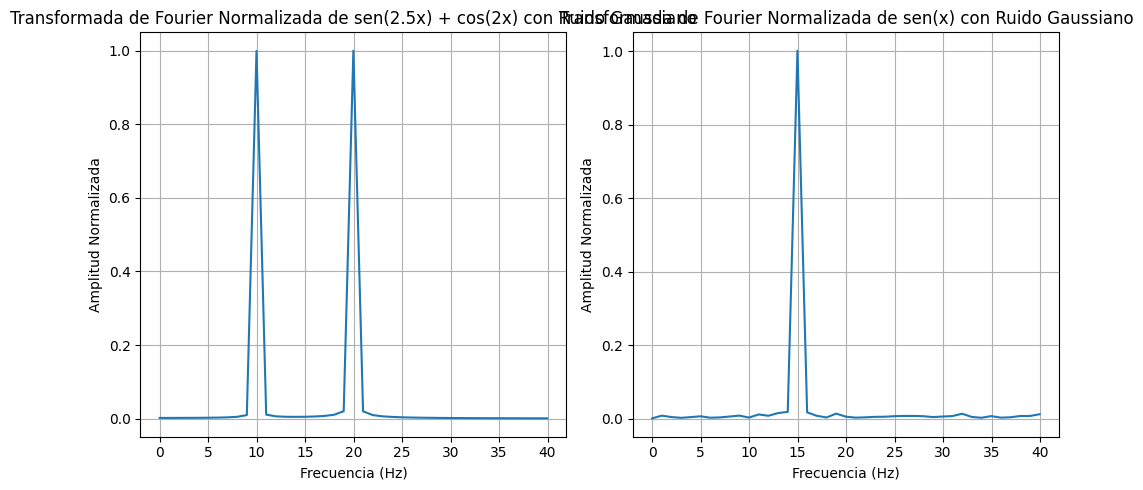

In [11]:
# Normalizar las transformadas dividiendo por el número de puntos y multiplicando por 2
transformada_normalizada_sen_cos = (2 / num_puntos) * transformada_positiva_sen_cos
transformada_normalizada_sen = (2 / num_puntos) * transformada_positiva_sen

# Graficar las transformadas normalizadas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(frecuencias_positivas_sen_cos[rango_frecuencias_sen_cos], np.abs(transformada_normalizada_sen_cos[rango_frecuencias_sen_cos]))
plt.title('Transformada de Fourier Normalizada de sen(2.5x) + cos(2x) con Ruido Gaussiano')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Normalizada')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(frecuencias_positivas_sen[rango_frecuencias_sen], np.abs(transformada_normalizada_sen[rango_frecuencias_sen]))
plt.title('Transformada de Fourier Normalizada de sen(x) con Ruido Gaussiano')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Normalizada')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

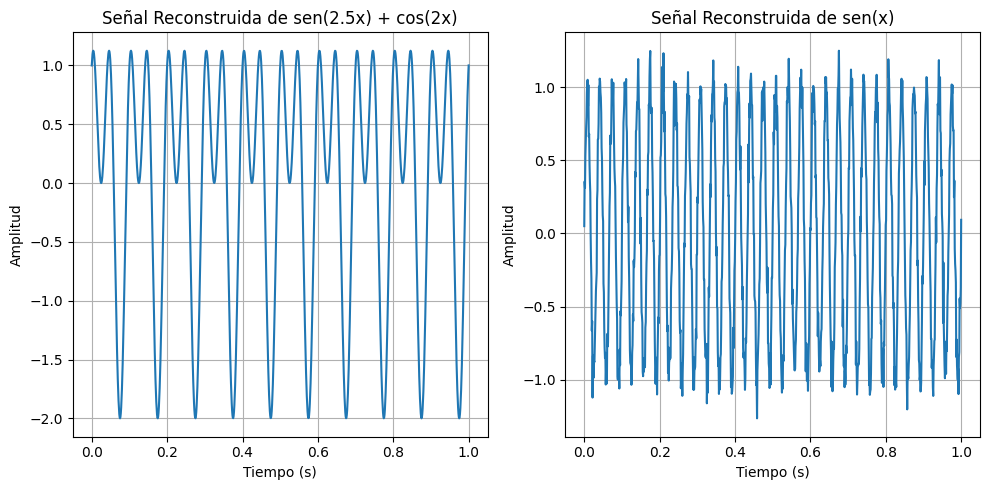

In [ ]:
# Calcular la transformada inversa de Fourier de las transformadas originales
señal_reconstruida_sen_cos = np.fft.ifft(transformada_sen_cos).real
señal_reconstruida_sen = np.fft.ifft(transformada_sen).real

# Truncar la señal reconstruida para que coincida con la longitud de la variable de tiempo
señal_reconstruida_truncada_sen_cos = señal_reconstruida_sen_cos[:num_puntos]
señal_reconstruida_truncada_sen = señal_reconstruida_sen[:num_puntos]

# Graficar las señales reconstruidas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tiempo, señal_reconstruida_truncada_sen_cos)
plt.title('Señal Reconstruida de sen(2.5x) + cos(2x)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(tiempo, señal_reconstruida_truncada_sen)
plt.title('Señal Reconstruida de sen(x)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


fft.ifft(a, n=None, axis=-1, norm=None):
La ifft calcula la transformada inversa rápida de Fourier, tal así que una señal "a" será devuelta a la señal original luego de haber usado la fft sobre ella con un grado de presición matematico.
Recibe hasta 3 argumentos.
Argumentos:
a: Es el arreglo de entrada que contiene la señal en el dominio de la frecuencia que se desea transformar de vuelta al dominio del tiempo. Este arreglo debe ser de tipo complejo.
n: Este es un argumento opcional. Si se proporciona, especifica la longitud de la señal de salida en el dominio del tiempo. Si es menor que la longitud de la señal de entrada, la señal de entrada se truncará. Si es mayor, la señal de entrada se rellenará con ceros.
axis: También es un argumento opcional que especifica a lo largo de qué eje se realiza la IFFT. Por defecto, es -1, lo que significa que se aplica a lo largo del último eje.
La operación que realiza matematicamente es la siguiente.
$
\text{IFFT}(X(k)) = \tfrac{1}{N}\sum_{n=0}^{N-1} X(k) \cdot e^{i 2 \pi \tfrac{kn}{N}}
$

Donde:
- \( X(k) \) es la señal en el dominio de la frecuencia.
- \( N \) es el número de muestras en la señal.
- \( k \) es el índice de frecuencia.
- \( n \) es el índice de tiempo.
- \( i \) es la unidad imaginaria.


### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

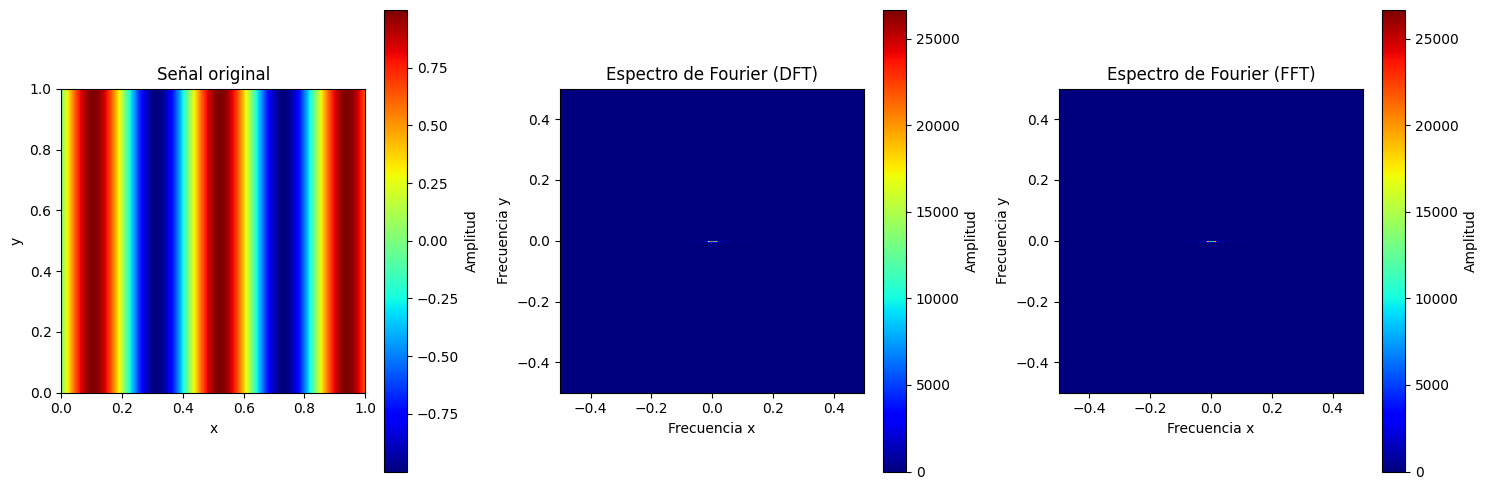

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal bidimensional
def signal(x, y):
    return np.sin(15 * x)

# Tamaño de la imagen
N = 256
M = 256

# Crear una cuadrícula para la señal
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, M)
X, Y = np.meshgrid(x, y)

# Calcular la señal
f = signal(X, Y)

# Calcular la DFT bidimensional
def dft2(f):
    N, M = f.shape
    F = np.zeros((N, M), dtype=np.complex128) #dado que por errores de punto flotante pueden acabar siendo
    #resultados no complejos, se especifica el tipo de datos.
    for u in range(N):
        for v in range(M):
            for x in range(N):
                for y in range(M):
                    F[u, v] += f[x, y] * np.exp(-2j * np.pi * ((u * x) / N + (v * y) / M))
    return F

F_dft = dft2(f)

# Calcular la FFT bidimensional
def fft2(f):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
    #Se centra el cero, se realiza la transformada y se vuelve al orden original.

F_fft = fft2(f)

# Visualizar la señal y su espectro de Fourier
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Señal original")
plt.imshow(f, extent=(0, 1, 0, 1), cmap='jet')
plt.colorbar(label='Amplitud')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.title("Espectro de Fourier (DFT)")
plt.imshow(np.abs(np.fft.fftshift(F_dft)), extent=(-0.5, 0.5, -0.5, 0.5), cmap='jet')
plt.colorbar(label='Amplitud')
plt.xlabel('Frecuencia x')
plt.ylabel('Frecuencia y')

plt.subplot(1, 3, 3)
plt.title("Espectro de Fourier (FFT)")
plt.imshow(np.abs(F_fft), extent=(-0.5, 0.5, -0.5, 0.5), cmap='jet')
plt.colorbar(label='Amplitud')
plt.xlabel('Frecuencia x')
plt.ylabel('Frecuencia y')

plt.tight_layout()
plt.show()


### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

El ruido en el espacio temporal en un punto es la suma de todas las sinosoides que componen ese ruido en ese punto.

El ruido en el espacio frecuencial es la potencia de ese ruido en esa frecuencia en concreto.

Los resultados de la transformada de fourier son los mismos para el caso 1D y 2D, potencias en cierta frecuencias,
si bien para la transformada 2D esto puede ser menos intuitivo, no deja de ser cierto, se sigue pudiendo apreciar
la simetria respecto al origen la cual tambien se da en la transformada 1D solo que se evitan las frecuencias negativas al momento de graficar.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

[How to Create Any Image Using Only Sine Functions | 2D Fourier Transform in Python] https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/